<a href="https://colab.research.google.com/github/Nargis45/feature_engineering/blob/main/Outliers_and_its_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Outliers and its impact on machine learning usecases**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df['Age'].isnull().sum()

177

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


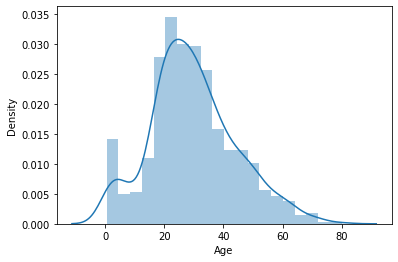

In [42]:
sns.distplot(df['Age'].dropna())

**It's normally distributed there's no outliers so we will add it from our side by filling the null values with a big age value.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


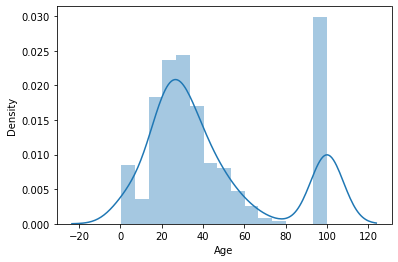

In [43]:
sns.distplot(df['Age'].fillna(100))

# **Guassian distribution**

Text(0, 0.5, 'Number of pasengers')

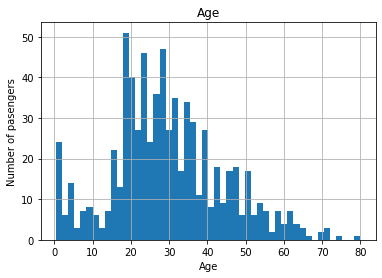

In [44]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of pasengers')

**finding outliers in gaussian distribution**

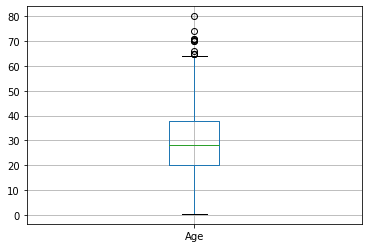

In [45]:
figure=df.boxplot(column='Age')

In [46]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Assuming age follows a gaussian distribution, we will calculate the boundaries (3 std. dev.) which differentiate the outliers**

In [47]:
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()

In [48]:
print(lower_boundary), print(upper_boundary), print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

# **Feature is skewed**

Text(0, 0.5, 'Number of pasengers')

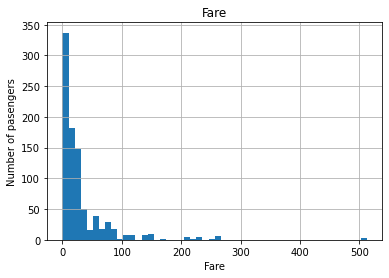

In [49]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of pasengers')

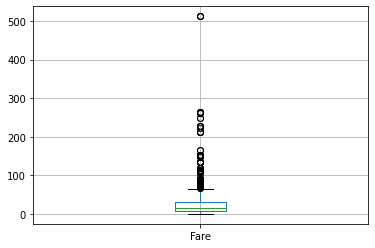

In [50]:
df.boxplot(column='Fare')

In [51]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**If data is skewed then compute inter quantile range to calculate the boundaries**

In [76]:
IQR=df.Fare.quantile(0.75)-df.Age.quantile(0.25)
IQR

10.875

In [77]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)

In [78]:
print(lower_bridge), print(upper_bridge)

-8.4021
47.3125


(None, None)

In [79]:
#Extreme outliers (multiply with 3)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)

In [80]:
print(lower_bridge), print(upper_bridge)

-24.7146
63.625


(None, None)

In [59]:
data=df.copy()

In [81]:
data.loc[data['Age']>73, 'Age']=73

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data.loc[data['Fare']>=63, 'Fare']=63

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,63,63,63,63,63,63.0,63,63,63,63.000,63,63
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


Text(0, 0.5, 'Number of pasengers')

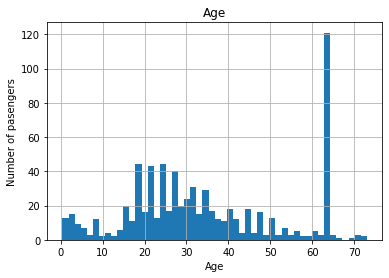

In [85]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of pasengers')

Text(0, 0.5, 'Number of pasengers')

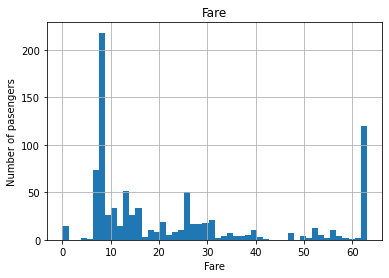

In [86]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of pasengers')

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size=0.3)

In [96]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc Score: {}'.format(roc_auc_score(y_test, y_pred1, multi_class='ovr')))

Accuracy Score: 0.7276119402985075
roc_auc Score: 0.790173850569665


In [95]:
#RandomForest regression
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc Score: {}'.format(roc_auc_score(y_test, y_pred1, multi_class='ovr')))
#roc_auc = roc_auc_score(y_test,y_pred1, multi_class='ovr')
#print(roc_auc)

Accuracy Score: 0.6865671641791045
roc_auc Score: 0.810794674093696
